<a href="https://colab.research.google.com/github/Neurocoders/AttentionProject/blob/branch2/Copy_of_load_steinmetz_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Steinmetz data

includes some visualizations

In [2]:
#@title Data retrieval
import os, requests

fname = ['steinmetz_st.npz']
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')


url = ["https://osf.io/4bjns/download"]
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [3]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [4]:
#@title Data loading
import numpy as np

dat_LFP = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']
dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']
dat_ST = np.load('steinmetz_st.npz', allow_pickle=True)['dat']



# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat_lfp = dat_LFP[11] #beware of lfp vs LFP here
print(dat_lfp.keys())
dat = dat_WAV[11]
print(dat.keys())
dat = dat_ST[11]
print(dat.keys())

dict_keys(['lfp', 'lfp_passive', 'brain_area_lfp'])
dict_keys(['waveform_w', 'waveform_u', 'trough_to_peak'])
dict_keys(['ss', 'ss_passive'])


`dat_LFP`, `dat_WAV`, `dat_ST` contain 39 sessions from 10 mice, data from Steinmetz et al, 2019, supplemental to the main data provided for NMA. Time bins for all measurements are 10ms, starting 500ms before stimulus onset (same as the main data). The followin fields are available across the three supplemental files. 

* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['ss']`: neurons by trials. Exact spikes times for each neuron and each trial, reference to the stimulus onset. A (neuron,trial) entry can be an empty list if that neuron did not fire at all on that trial. 
* `dat['%X%_passive']`: same as above for `X` = {`lfp`, `ss`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




In [5]:
# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

In [6]:
#@ Run this cell if you want to see the shape of different data dictionary fields

for keys in dat_lfp:
    try:
        print(f"the shape of {keys} is:", dat_lfp[keys].shape)
    except:
        print(f"{keys}:", dat_lfp[keys])
        


the shape of lfp is: (12, 340, 250)
the shape of lfp_passive is: (12, 110, 250)
brain_area_lfp: ['DG', 'LGd', 'SUB', 'VISp', 'ACA', 'MOs', 'PL', 'CA1', 'DG', 'LH', 'MD', 'VISam']


In [7]:
# Initial required variables

dt = 10 # binning at 10 ms
NT = dat_lfp['lfp'].shape[-1] # number of time bins
time_vec = dt * np.arange(NT)
total_trial = dat_lfp['lfp'].shape[1]
# lfp has form brain area* trial * time

['DG', 'LGd', 'SUB', 'VISp', 'ACA', 'MOs', 'PL', 'CA1', 'DG', 'LH', 'MD', 'VISam']
please insert the first lfp region to plot:CA1
please insert the second lfp region to plot:VISam


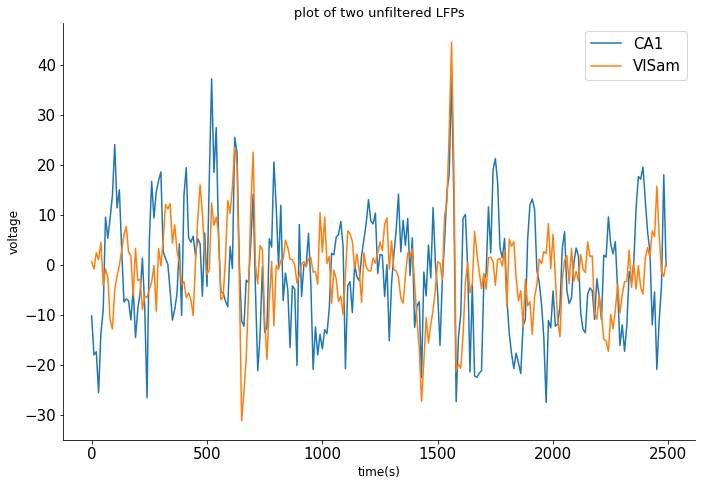

In [ ]:
def lfp_plotter(dat =dat_lfp, area1_2_see ="VISam", area2_2_see = "MD", trial_num = 1):
    """
    This function plots two stances of lfp for visualization. the function is case 
    sensitive for areas.

    dat: data that contains the array of LFPs. can be changed in the loading data cell
    area1_2_see: the first are for visualization 
    area2_2_see: the second are for visualization 
    trial_num: number of trial for visualization
    """
    
    
    print(dat["brain_area_lfp"])
    area1_2_see = input("please insert the first lfp region to plot:")
    area2_2_see = input("please insert the second lfp region to plot:")
    
    ind1_2_see = dat["brain_area_lfp"].index(area1_2_see)
    ind2_2_see = dat["brain_area_lfp"].index(area2_2_see)
    regions = np.array(dat["brain_area_lfp"]) # this is for multiple occurances of one region
    # see if there are multiple recordings of one area
    if dat["brain_area_lfp"].count(area1_2_see) >1:
        what_area1 = int(input("more than region with this name was found,\
        please specify which instance you want to see (1: first, 2:second,...)"))
        ind1_2_see = np.where(regions == area1_2_see)[0][what_area1-1]


    if dat["brain_area_lfp"].count(area2_2_see) >1:
        what_area2 = int(input("more than region with this name was found,\
        please specify which instance you want to see (1: first, 2:second,...)"))
        ind2_2_see = np.where(regions == area2_2_see)[0][what_area2-1]

    # pdb.set_trace()
    plt.figure(figsize = (10,7))
    plt.plot(time_vec, dat["lfp"][ind1_2_see, trial_num,:], label = area1_2_see );
    plt.plot(time_vec, dat["lfp"][ind2_2_see, trial_num, :], label = area2_2_see)
    # plt.axvline(x = dat["gocue"][trial_num], color = 'black', label = "go cue")  need the go cue and response/reaction time 
    # plt.axvline(x = (dat["response_time"]+dat["gocue"]) [trial_num],              from the main data
    #             ls = '--', color = 'black', label = "response time")

    plt.xlabel("time(s)", fontsize = 12)
    plt.ylabel("voltage", fontsize = 12)
    plt.title("plot of two unfiltered LFPs", fontsize = 13)
    plt.legend()
    plt.show()
lfp_plotter()

In [25]:
# np.shape(dat_lfp["lfp"][1, 1, :])
np.shape(time_vec)

(250,)

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


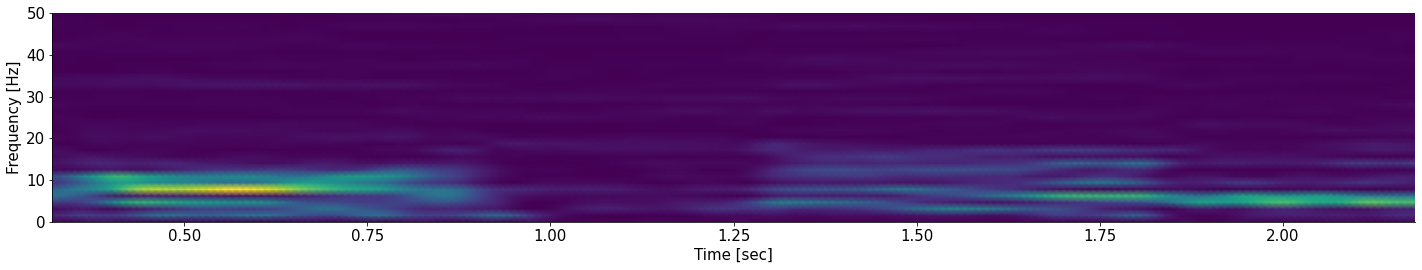

(33,) (187,)


In [51]:
from scipy import signal
from scipy.fft import fftshift
fs =  1/ ((time_vec[1] - time_vec[0] ) * 1e-3)

f1,t1,S1xx = signal.spectrogram(dat_lfp["lfp"][1, 1, :],fs = 100,nfft=64, nperseg = 64,noverlap=63) # This config gives the best Spectrogram. Reducing the nfft reduces freq resolution
f2,t2,S2xx = signal.spectrogram(dat_lfp["lfp"][1, 1, :],fs=100)
plt.pcolormesh(t1, f1, S1xx,shading = 'gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
print(np.shape(f1),np.shape(t1))
# Pxx, freqs, bins, im = plt.specgram(dat_lfp["lfp"][1, 1, :],NFFT=32, noverlap=31,Fs = 100) # Another way of plotting spectrogram
